In [76]:
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (5, 3)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [104]:
def f(dataframe):
    df_dict = {'Train': 'pickles/df_train.pickle',
              'Test': 'pickles/df_test.pickle'}
    with open(df_dict[dataframe],'rb') as read_file:
        global df
        df = pickle.load(read_file)
    
    print('\n\t\tdf = selected dataframe\n\t\tshape = ', df.shape)
    global selection
    selection = dataframe

interact(f, dataframe = ['Train', 'Test']);

interactive(children=(Dropdown(description='dataframe', options=('Train', 'Test'), value='Train'), Output()), …

In [105]:
# convert target variable to ordered categorical
df.loc[:, 'candidate_pulsar'] = df['candidate_pulsar'].astype('category')
df['candidate_pulsar'] = df['candidate_pulsar'].cat.as_ordered()

In [106]:
if selection == 'Train':
    df, df_val = train_test_split(df, test_size = 0.2, random_state = 25)
    print('df shape: ', df.shape, '\ndf_val shape: ', df_val.shape)

df shape:  (11454, 9) 
df_val shape:  (2864, 9)


## Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

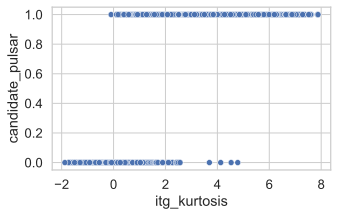

In [108]:
sns.scatterplot(data = df, x = 'itg_kurtosis', y = 'candidate_pulsar');

In [109]:
logr = LogisticRegression()

In [110]:
logr.fit(df_train[['itg_kurtosis']], df_train['candidate_pulsar'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
print('intercept: ', round(logr.intercept_[0], 4))
print('itg_kurtosis coef: ', round(logr.coef_[0][0], 4))

intercept:  -5.6136
itg_kurtosis coef:  4.071


In [115]:
df_eval = df_val.copy()
df_eval['pred'] = logr.predict(df_val[['itg_kurtosis']])
#df_eval.loc[:, 'pred'] = df_eval['pred'].astype('category')
df_eval['correct_pred'] = df_eval['pred'] == df_eval['candidate_pulsar']

KeyboardInterrupt: 

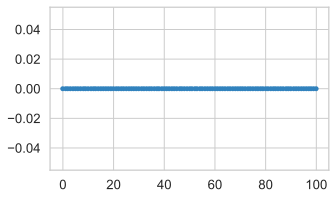

In [116]:
sns.stripplot(data=df_eval,
              x='itg_kurtosis',
              y='pred',
              hue='correct_pred',
              palette={False: '#f03b20', True: '#3182bd'});